# Mean Interparticle Spacing

Evaluation of the mean interparticle spacing into an optical trap.

In [43]:
import os


working_directory = "D:/PhD_Trieste/Simulations/Imaging_Simulation"

if os.getcwd()!= working_directory:
    os.chdir(working_directory)  
    
print(working_directory)

import Simulations_Libraries.trajectory_library as trajlib
import numpy as np
import matplotlib.pyplot as plt
from Camera import *
from scipy.stats import poisson
from scipy.optimize import curve_fit
import Simulations_Libraries.general_library as genlib
from tqdm import tqdm

plt.ion()

D:/PhD_Trieste/Simulations/Imaging_Simulation


In [44]:
# Spatial Distribution 
def QHO_1D_Distribution(q,qRMS):
    return 1/np.sqrt(2*np.pi*(qRMS**2)) * np.exp(- 0.5*((q/qRMS)**2))
    

In [45]:
# System parameters
nOfAtoms = 100
isotope = 171
baseAtom = trajlib.Ytterbium(0,0,0, 0,0,0,isotope=isotope)
initialT = 20e-6 # initial temperature
# ODT
k = 4

trapFreqX =np.sqrt((1 + k**4)/2) * 2 * np.pi * 30 
trapFreqY = 2*np.pi*2.7e3
trapFreqZ = k * 2*np.pi*2.7e3


'''
# Free Run 
freqPerp = 100
trapFreqX = 2 * np.pi * freqPerp
trapFreqY = 2*np.pi* freqPerp
trapFreqZ = 2 * np.pi * 3e3
'''

n_0X = trajlib.n_T(trapFreqX,initialT)
n_0Y = trajlib.n_T(trapFreqY,initialT)
n_0Z = trajlib.n_T(trapFreqZ,initialT)

x_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqX)*(2*n_0X+1))
y_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqY)*(2*n_0Y+1))
z_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqZ)*(2*n_0Z+1))
    
v_x_rms = np.sqrt(trajlib.hbar*trapFreqX/(2*baseAtom.m)*(2*n_0X+1))
v_y_rms = np.sqrt(trajlib.hbar*trapFreqY/(2*baseAtom.m)*(2*n_0Y+1))
v_z_rms = np.sqrt(trajlib.hbar*trapFreqZ/(2*baseAtom.m)*(2*n_0Z+1))


In [46]:
# Imaging parameters 

freq = trajlib.c/(baseAtom.transitions[0].Lambda) 
Lambda = trajlib.c/freq
NA = 0.6
opticalResolution = 0.61 * Lambda/NA
'''-------------------------------pixels and camera------------------------------'''
pixelScale = 1#                                                                     
pixelType = "" if pixelScale == 1 else f"_{int(pixelScale)}reduction"
nPixels = np.array([108,108]) * int(pixelScale)  # reducted ROI
#nPixels = np.array([360,360]) * int(pixelScale) # biggest possible ROI
pixelSize = 4.6e-6 / pixelScale
magnification = 8 #8
cameraSize = pixelSize*nPixels
atomSpaceSize = cameraSize / magnification

print('Microscope Objective Resolution =', np.round(opticalResolution*1e9),'nm')

Microscope Objective Resolution = 406.0 nm


In [47]:
# Mean Interparticle Spacing along the three spatial directions 

x = np.linspace(-atomSpaceSize[0]/2,atomSpaceSize[0]/2,10000)
y = np.linspace(-atomSpaceSize[1]/2,atomSpaceSize[1]/2,10000)
z = np.linspace(-atomSpaceSize/20,atomSpaceSize/20,10000)

densX = nOfAtoms * QHO_1D_Distribution(q = x,qRMS = x_rms)
densY = nOfAtoms * QHO_1D_Distribution(q = y,qRMS = y_rms)
densZ = nOfAtoms * QHO_1D_Distribution(q = z,qRMS = z_rms)

meanIntSpacX = 1/densX
meanIntSpacY = 1/densY
meanIntSpacZ = 1/densZ


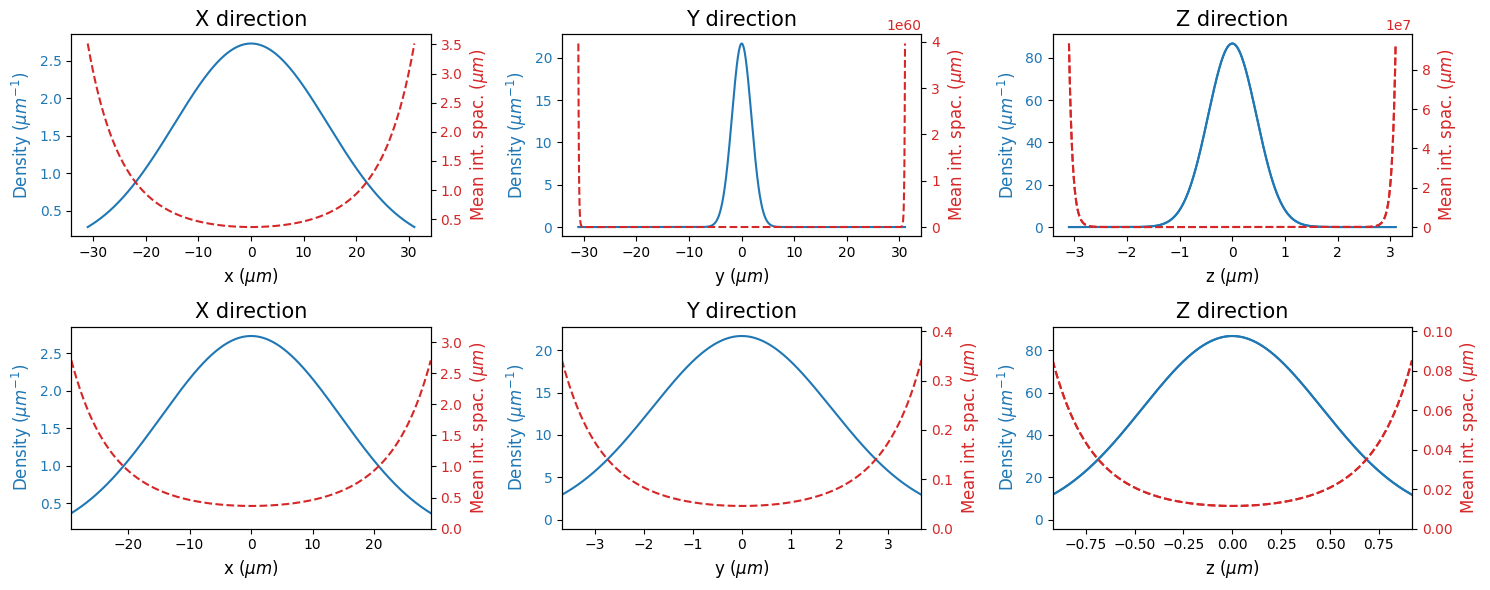

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 6), sharex=False)

# --- X direction ---
ax = axes[0,0]
ax2 = ax.twinx()

ax.plot(x*1e6, densX*1e-6, color='tab:blue', label=r'Density')
ax2.plot(x*1e6, meanIntSpacX*1e6, color='tab:red', linestyle='--', label='Mean spacing')

ax.set_title('X direction',fontsize = 15)
ax.set_xlabel('x ($\mu m$)',fontsize = 12)
ax.set_ylabel('Density ($\mu m ^{-1}$)', color='tab:blue',fontsize = 12)
ax2.set_ylabel('Mean int. spac. ($\mu m$)', color='tab:red',fontsize = 12)

ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')


# --- Y direction ---
ax = axes[0,1]
ax2 = ax.twinx()

ax.plot(y*1e6, densY*1e-6, color='tab:blue')
ax2.plot(y*1e6, meanIntSpacY*1e6, color='tab:red', linestyle='--')

ax.set_title('Y direction',fontsize = 15)
ax.set_xlabel('y ($\mu m$)',fontsize = 12)
ax.set_ylabel('Density ($\mu m ^{-1}$)', color='tab:blue',fontsize = 12)
ax2.set_ylabel('Mean int. spac. ($\mu m$)', color='tab:red',fontsize = 12)

ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')


# --- Z direction ---
ax = axes[0,2]
ax2 = ax.twinx()

ax.plot(z*1e6, densZ*1e-6, color='tab:blue')
ax2.plot(z*1e6, meanIntSpacZ*1e6, color='tab:red', linestyle='--')

ax.set_title('Z direction',fontsize = 15)
ax.set_xlabel('z ($\mu m$)',fontsize = 12)
ax.set_ylabel('Density ($\mu m ^{-1}$)', color='tab:blue',fontsize = 12)
ax2.set_ylabel('Mean int. spac. ($\mu m$)', color='tab:red',fontsize = 12)

ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')


### Region 2 sigma around the center 
# --- X direction ---
ax = axes[1,0]
ax2 = ax.twinx()

ax.plot(x*1e6, densX*1e-6, color='tab:blue', label=r'Density')
ax2.plot(x*1e6, meanIntSpacX*1e6, color='tab:red', linestyle='--', label='Mean spacing')

ax.set_title('X direction',fontsize = 15)
ax.set_xlabel('x ($\mu m$)',fontsize = 12)
ax.set_ylabel('Density ($\mu m ^{-1}$)', color='tab:blue',fontsize = 12)
ax2.set_ylabel('Mean int. spac. ($\mu m$)', color='tab:red',fontsize = 12)

ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax.set_xlim(-2*x_rms*1e6,2*1e6*x_rms)
ylim = 1.2*(1/nOfAtoms / QHO_1D_Distribution(q = 2*x_rms,qRMS = x_rms) * 1e6)
ax2.set_ylim(0,ylim)




# --- Y direction ---
ax = axes[1,1]
ax2 = ax.twinx()

ax.plot(y*1e6, densY*1e-6, color='tab:blue')
ax2.plot(y*1e6, meanIntSpacY*1e6, color='tab:red', linestyle='--')

ax.set_title('Y direction',fontsize = 15)
ax.set_xlabel('y ($\mu m$)',fontsize = 12)
ax.set_ylabel('Density ($\mu m ^{-1}$)', color='tab:blue',fontsize = 12)
ax2.set_ylabel('Mean int. spac. ($\mu m$)', color='tab:red',fontsize = 12)

ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax.set_xlim(-2*y_rms*1e6,2*1e6*y_rms)
ylim = 1.2*(1/nOfAtoms / QHO_1D_Distribution(q = 2*y_rms,qRMS = y_rms) * 1e6)
ax2.set_ylim(0,ylim)


# --- Z direction ---
ax = axes[1,2]
ax2 = ax.twinx()

ax.plot(z*1e6, densZ*1e-6, color='tab:blue')
ax2.plot(z*1e6, meanIntSpacZ*1e6, color='tab:red', linestyle='--')

ax.set_title('Z direction',fontsize = 15)
ax.set_xlabel('z ($\mu m$)',fontsize = 12)
ax.set_ylabel('Density ($\mu m ^{-1}$)', color='tab:blue',fontsize = 12)
ax2.set_ylabel('Mean int. spac. ($\mu m$)', color='tab:red',fontsize = 12)

ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax.set_xlim(-2*z_rms*1e6,2*1e6*z_rms)
ylim = 1.2*(1/nOfAtoms / QHO_1D_Distribution(q = 2*z_rms,qRMS = z_rms) * 1e6)
ax2.set_ylim(0,ylim)


plt.tight_layout()
plt.show()


In [49]:
# Mean interparticle spacing in the focal plane

x = np.linspace(-atomSpaceSize[0]/2,atomSpaceSize[0]/2,100)
y = np.linspace(-0.2*atomSpaceSize[1]/2,0.2*atomSpaceSize[1]/2,100)

densPlanar = np.zeros([len(x),len(y)])

for i in range(len(x)):
    densPlanar[i,:] = nOfAtoms * QHO_1D_Distribution(q = x[i],qRMS = x_rms) * QHO_1D_Distribution(q = y,qRMS = y_rms)

meanIntSpacPlanar= np.sqrt(1/densPlanar)



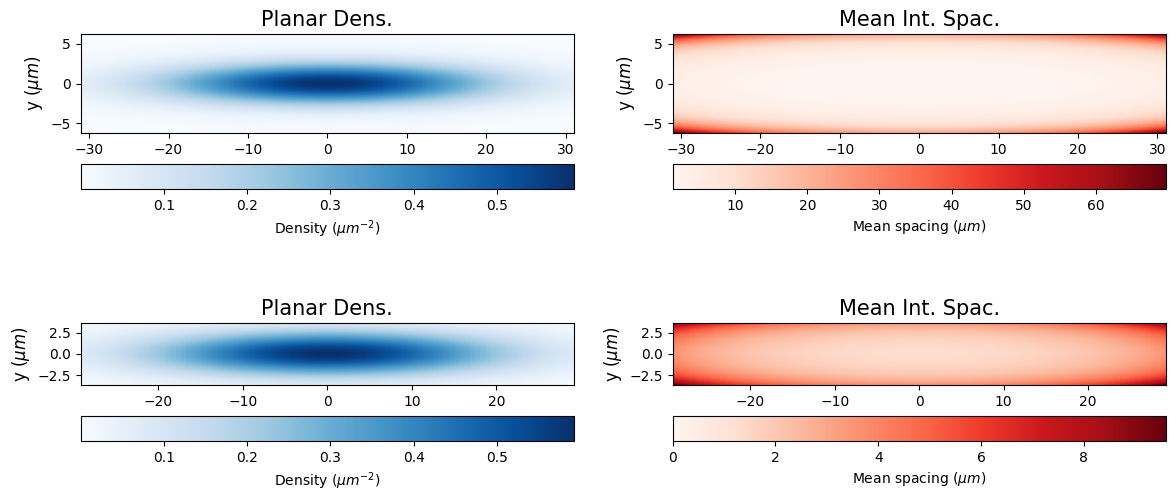

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    2, 2,
    figsize=(14, 6),
    gridspec_kw={'wspace': 0.2}  # increase this value
)

# --- Density plot ---
im0 = axes[0,0].imshow(
    densPlanar.T * 1e-12,
    extent=[x.min()*1e6, x.max()*1e6, y.min()*1e6, y.max()*1e6],
    origin='lower',
    cmap='Blues',
    aspect='equal'
)
axes[0,0].set_title('Planar Dens.', fontsize=15)
axes[0,0].set_xlabel('x ($\mu m$)', fontsize=12)
axes[0,0].set_ylabel('y ($\mu m$)', fontsize=12)

cbar0 = plt.colorbar(
    im0,
    ax=axes[0,0],
    orientation='horizontal',
    pad=0.15
)
cbar0.set_label(r'Density ($\mu m^{-2}$)')


# --- Mean interparticle spacing plot ---
im1 = axes[0,1].imshow(
    meanIntSpacPlanar.T * 1e6,
    extent=[x.min()*1e6, x.max()*1e6, y.min()*1e6, y.max()*1e6],
    origin='lower',
    cmap='Reds',
    aspect='equal'
)
axes[0,1].set_title('Mean Int. Spac.', fontsize=15)
axes[0,1].set_xlabel('x ($\mu m$)', fontsize=12)
axes[0,1].set_ylabel('y ($\mu m$)', fontsize=12)

cbar1 = plt.colorbar(
    im1,
    ax=axes[0,1],
    orientation='horizontal',
    pad=0.15
)
cbar1.set_label('Mean spacing ($\mu m$)')





### Region 2 sigma around the center 




# --- Density plot ---


im0 = axes[1,0].imshow(
    densPlanar.T * 1e-12,
    extent=[x.min()*1e6, x.max()*1e6, y.min()*1e6, y.max()*1e6],
    origin='lower',
    cmap='Blues',
    aspect='equal'
)
axes[1,0].set_title('Planar Dens.', fontsize=15)
axes[1,0].set_xlabel('x ($\mu m$)', fontsize=12)
axes[1,0].set_ylabel('y ($\mu m$)', fontsize=12)

axes[1,0].set_xlim(-2*x_rms*1e6,2*x_rms*1e6)
axes[1,0].set_ylim(-2*y_rms*1e6,2*y_rms*1e6)

cbar0 = plt.colorbar(
    im0,
    ax=axes[1,0],
    orientation='horizontal',
    pad=0.15
)
cbar0.set_label(r'Density ($\mu m^{-2}$)')


# --- Mean interparticle spacing plot ---
vmin = 0
vmax = 1/np.sqrt(nOfAtoms * QHO_1D_Distribution(q = 2*x_rms,qRMS = x_rms) * QHO_1D_Distribution(q = 2*y_rms,qRMS = y_rms)) * 1e6
im1 = axes[1,1].imshow(
    meanIntSpacPlanar.T * 1e6,
    extent=[x.min()*1e6, x.max()*1e6, y.min()*1e6, y.max()*1e6],
    origin='lower',
    cmap='Reds',
    aspect='equal',
    vmin = vmin,
    vmax = vmax
)
axes[1,1].set_title('Mean Int. Spac.', fontsize=15)
axes[1,1].set_xlabel('x ($\mu m$)', fontsize=12)
axes[1,1].set_ylabel('y ($\mu m$)', fontsize=12)

axes[1,1].set_xlim(-2*x_rms*1e6,2*x_rms*1e6)
axes[1,1].set_ylim(-2*y_rms*1e6,2*y_rms*1e6)


meanIntSpacPlanar= np.sqrt(1/densPlanar)

cbar1 = plt.colorbar(
    im1,
    ax=axes[1,1],
    orientation='horizontal',
    pad=0.15
)
cbar1.set_label('Mean spacing ($\mu m$)')




#plt.tight_layout()
plt.show()


# Min mean planar interparticle spacing for different atom number values

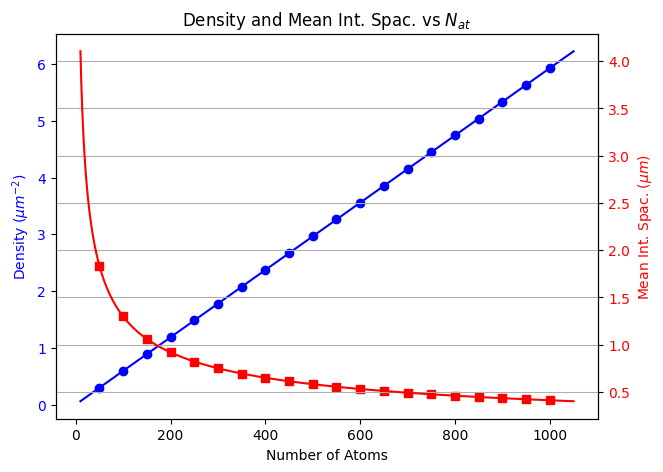

In [51]:
nOfAtoms = np.linspace(10,1050,10000)
maxDensPlanar = nOfAtoms * QHO_1D_Distribution(q = 0,qRMS = x_rms) * QHO_1D_Distribution(q = 0,qRMS = y_rms)
minMeanIntSpacPlanar= np.sqrt(1/maxDensPlanar)

nOfAtomsScatter = np.arange(50,1050,50)
maxDensPlanarScatter = nOfAtomsScatter * QHO_1D_Distribution(q = 0,qRMS = x_rms) * QHO_1D_Distribution(q = 0,qRMS = y_rms)
minMeanIntSpacPlanarScatter= np.sqrt(1/maxDensPlanarScatter)

fig, ax1 = plt.subplots(figsize=(7,5))

# Plot density on left y-axis
ax1.plot(nOfAtoms, maxDensPlanar *1e-12,color = 'b')
ax1.scatter(nOfAtomsScatter, maxDensPlanarScatter *1e-12, color = 'b',marker = 'o')
ax1.set_xlabel('Number of Atoms')
ax1.set_ylabel('Density ($\mu m^{-2}$)', color='b')
ax1.tick_params(axis='y', labelcolor='b')


# Create right y-axis for mean interparticle spacing
ax2 = ax1.twinx()
ax2.plot(nOfAtoms, minMeanIntSpacPlanar*1e6,color = 'r')
ax2.scatter(nOfAtomsScatter, minMeanIntSpacPlanarScatter *1e6, color = 'r',marker = 's')
ax2.set_ylabel('Mean Int. Spac. ($\mu m$)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
#ax2.hlines(opticalResolution*1e6,0,np.max(nOfAtoms),ls = '--', color = 'r', label = 'Optical Resolution')


plt.title('Density and Mean Int. Spac. vs $N_{at}$')
plt.grid(True)
plt.show()

# Min mean planar interparticle spacing for 100 atoms for different planar trap frequencies

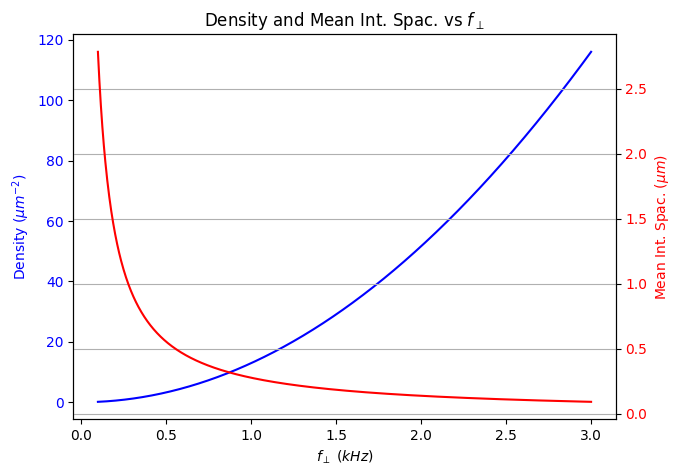

In [65]:
# System parameters
nOfAtoms = 100
isotope = 171
baseAtom = trajlib.Ytterbium(0,0,0, 0,0,0,isotope=isotope)
initialT = 1e-6 # initial temperature


# Free Run 
freqPerp = np.linspace(100,3000,1000)
trapFreqX = 2 * np.pi * freqPerp
trapFreqY = 2*np.pi* freqPerp
trapFreqZ = 2 * np.pi * 3e3


n_0X = trajlib.n_T(trapFreqX,initialT)
n_0Y = trajlib.n_T(trapFreqY,initialT)
n_0Z = trajlib.n_T(trapFreqZ,initialT)

x_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqX)*(2*n_0X+1))
y_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqY)*(2*n_0Y+1))
z_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqZ)*(2*n_0Z+1))
    
v_x_rms = np.sqrt(trajlib.hbar*trapFreqX/(2*baseAtom.m)*(2*n_0X+1))
v_y_rms = np.sqrt(trajlib.hbar*trapFreqY/(2*baseAtom.m)*(2*n_0Y+1))
v_z_rms = np.sqrt(trajlib.hbar*trapFreqZ/(2*baseAtom.m)*(2*n_0Z+1))



maxDensPlanar = nOfAtoms * (QHO_1D_Distribution(q = 0,qRMS = x_rms)**2)# * QHO_1D_Distribution(q = 0,qRMS = y_rms)
minMeanIntSpacPlanar= np.sqrt(1/maxDensPlanar)


fig, ax1 = plt.subplots(figsize=(7,5))

# Plot density on left y-axis
ax1.plot(freqPerp*1e-3, maxDensPlanar *1e-12,color = 'b')
ax1.set_xlabel('$f_\perp$ $(kHz)$')
ax1.set_ylabel('Density ($\mu m^{-2}$)', color='b')
ax1.tick_params(axis='y', labelcolor='b')


# Create right y-axis for mean interparticle spacing
ax2 = ax1.twinx()
ax2.plot(freqPerp*1e-3, minMeanIntSpacPlanar*1e6,color = 'r')
ax2.set_ylabel('Mean Int. Spac. ($\mu m$)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
#ax2.hlines(opticalResolution*1e6,0,np.max(nOfAtoms),ls = '--', color = 'r', label = 'Optical Resolution')


plt.title('Density and Mean Int. Spac. vs $f_\perp$')
plt.grid(True)
plt.show()

# Fermi Wavevector as a function of the number of atoms

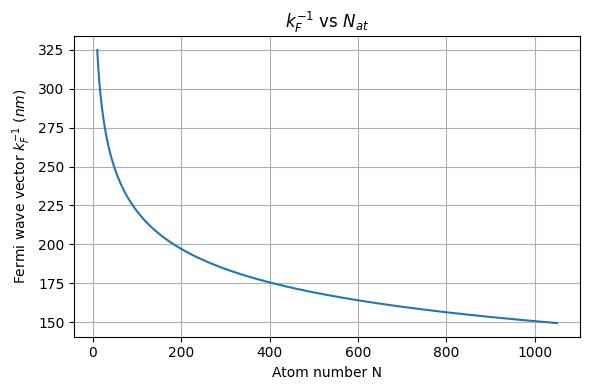

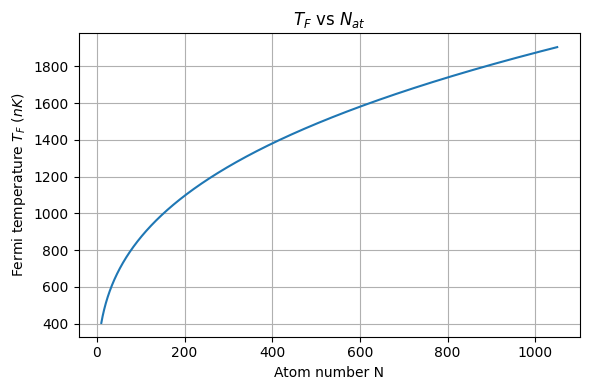

In [12]:

# ---------- physical constants ----------
hbar = trajlib.hbar
kB   = trajlib.kB     # J/K

# ---------- atomic parameters ----------
m = baseAtom.m/30        # mass [kg] (example: 40K)
g_s = 1             # spin degeneracy

k = 4
trapFreqX =np.sqrt((1 + k**4)/2) * 2 * np.pi * 30 
trapFreqY = 2*np.pi*2.7e3
trapFreqZ = k * 2*np.pi*2.7e3
trapFreqBar = (trapFreqX * trapFreqY * trapFreqZ) ** (1/3)

# ---------- atom number range ----------
nOfAtoms = np.linspace(10,1050,10000)

# ---------- Fermi wave vector ----------
E_F = hbar * trapFreqBar * (6 * nOfAtoms / g_s) ** (1/3)
T_F = E_F/trajlib.kB
k_F = np.sqrt(2 * m * E_F / hbar**2)

# ---------- plot ----------
plt.figure(figsize=(6,4))
plt.plot(nOfAtoms, k_F**(-1) * 1e9)
plt.xlabel("Atom number N")
plt.ylabel(r"Fermi wave vector $k_F^{-1}$ ($nm$)")
plt.title('$k_F^{-1}$ vs $N_{at}$')
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

# ---------- plot ----------
plt.figure(figsize=(6,4))
plt.plot(nOfAtoms, T_F * 1e9)
plt.xlabel("Atom number N")
plt.ylabel(r"Fermi temperature $T_F$ ($nK$)")
plt.title('$T_F$ vs $N_{at}$')
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


# PSF Dimension for different magnifications on the Camera Sensor

In [ ]:

realAtomExtension =  4 *  0.424 * Lambda/NA    # 4 * \sigma of the Gaussian fitted on the PSF (Airy Disk)
magnification = np.array([8,16,24,32,40]) 
atomExtensionCamera = realAtomExtension * magnification
atomExtensionPixels = atomExtensionCamera/pixelSize

magnificationS = np.linspace(8,40)
atomExtensionCameraS = realAtomExtension * magnificationS
atomExtensionPixelsS = atomExtensionCameraS/pixelSize

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Plot with markers and line
plt.scatter(magnification, atomExtensionPixels, marker = 'o', color='tab:blue', s=20, label='Atom Extension')
plt.plot(magnificationS, atomExtensionPixelsS, color='tab:blue',ls = '--')

# Labels
plt.xlabel('Magnification', fontsize=14)
plt.ylabel('Atom Extension (pixels)', fontsize=14)
plt.title('Atom Extension vs Magnification', fontsize=16)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: minor ticks
plt.minorticks_on()

# Optional: legend
plt.legend(fontsize=12)

# Tight layout for clean spacing
plt.tight_layout()

plt.show()

